### uploading usefull libraries

In [1]:
import handl_csv_h # module created for downloading and preparing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import argrelextrema

## Import data

In [2]:
ticker = "EUR_USD"
granularity = "M5"
order = 3

In [3]:
fs = highandlow_csv.highs_and_lows(granularity, order)

In [4]:
lows = fs.get_lows()
highs = fs.get_highs()
data = fs.get_highs_and_lows()

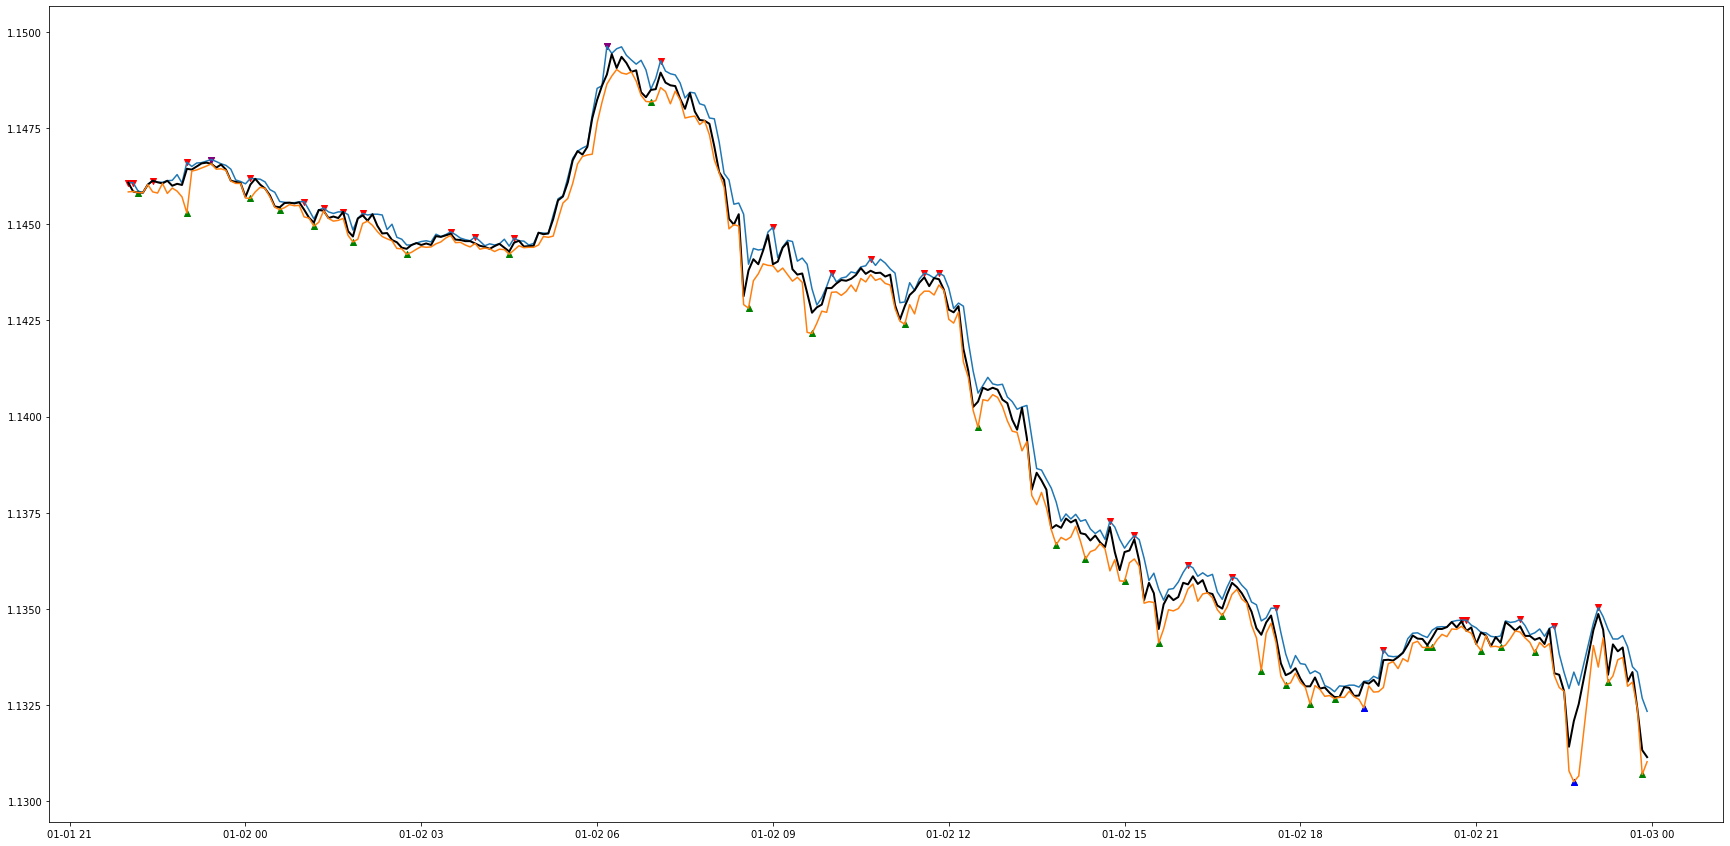

In [20]:
fs.line_plot("2019-01-01", "2019-01-02")

In [6]:
# To specify if trade will be taken
data['hour'] = data.index.hour

### Szukamy możliwości wejścia

Jeśli dwa kolejne szczyty są wzrostowe to szukamy wejścia na long i na odwrót.

### Wyższy rząd

In [7]:
hhighs = highs.dropna().copy(deep=True)
llows = lows.dropna().copy(deep=True)
###LONG
hhighs.loc[:,('direction')] = None
hhighs.direction.iloc[0] = 0
for bar in range(1, len(hhighs)):
    if hhighs.hhighs.iloc[bar-1] < hhighs.hhighs.iloc[bar-2]:
        hhighs.direction.iloc[bar] = -1
    elif hhighs.hhighs.iloc[bar-1] > hhighs.hhighs.iloc[bar-2]:
        hhighs.direction.iloc[bar] = 1
    else:
        hhighs.direction.iloc[bar] = hhighs.direction.iloc[bar-1]
###SHORT        
llows.loc[:,('direction')] = None
llows.direction.iloc[0] = 0
for bar in range(1, len(llows)):
    if llows.llows.iloc[bar-1] > llows.llows.iloc[bar-2]:
        llows.direction.iloc[bar] = 1
    elif lows.llows.iloc[bar-1] < llows.llows.iloc[bar-2]:
        llows.direction.iloc[bar] = -1
    else:
        llows.direction.iloc[bar] = llows.direction.iloc[bar-1]

data.loc[:,('hhs')] = hhighs.loc[:,('direction')].copy(deep=True)
data.loc[:,('lls')] = llows.loc[:,('direction')].copy(deep=True)
data = data.copy(deep=True)
data['hhs'] = data['hhs'].ffill()
data['lls'] = data['lls'].ffill()
data.dropna(inplace=True)
data

C:\Users\Sylwia\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,o,h,l,c,volume,highs,hhighs,lows,llows,hour,hhs,lls
time,,,,,,,,,,,,
2019-01-03 03:35:00,1.13690,1.13708,1.13679,1.13706,135,1.13708,1.13708,1.13562,1.13051,3,1.0,0.0
2019-01-03 03:40:00,1.13706,1.13708,1.13675,1.13683,63,1.13708,1.13708,1.13562,1.13051,3,1.0,0.0
2019-01-03 03:45:00,1.13682,1.13686,1.13648,1.13649,66,1.13708,1.13708,1.13562,1.13051,3,1.0,0.0
2019-01-03 03:50:00,1.13646,1.13651,1.13631,1.13631,49,1.13708,1.13708,1.13562,1.13051,3,1.0,0.0
2019-01-03 03:55:00,1.13628,1.13647,1.13628,1.13643,50,1.13708,1.13708,1.13562,1.13051,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-27 23:40:00,1.13785,1.13792,1.13783,1.13787,19,1.13792,1.13792,1.13699,1.13637,23,-1.0,1.0
2019-02-27 23:45:00,1.13783,1.13785,1.13780,1.13780,8,1.13792,1.13792,1.13699,1.13637,23,-1.0,1.0
2019-02-27 23:50:00,1.13777,1.13787,1.13777,1.13787,11,1.13792,1.13792,1.13699,1.13637,23,-1.0,1.0


In [8]:
####### INITIATE TRANSACTION #######
def fs_buy_fixed():
    global trades
    # We have to declare that each entry bar starts below last high.
    if df.h.iloc[bar] > df.highs.iloc[bar-1] and df.o.iloc[bar] < df.highs.iloc[bar-1]:
        trade = pd.DataFrame([[df.index[bar], #time bar
                               'long', #long position
                               round(df.highs.iloc[bar-1] + spread, 6), #entry price
                               round(df.lows.iloc[bar-1] - spread, 6), #stop loss price
                               round(df.highs.iloc[bar-1] + spread + (reward * (df.highs.iloc[bar-1] + spread - (df.lows.iloc[bar-1] - spread))), 6), # take profit price
                               0,0]], # the rest of columns will be filled once trade is closed
                     columns = ['time','position','entry_price','sl','tp','outcome_pips','total_amount_fixed'])
        trade.set_index('time', inplace=True)
        trades = trades.append(trade)
        print("{}: ST1 | Go Long  | Price: {} | SL: {} | TP: {}".format(df.index[bar].date(), trades.entry_price[-1], trades.sl[-1], trades.tp[-1]))
        
def fs_buy_trail():
    global trades_trail
    # We have to declare that each entry bar starts below last high.
    if df.h.iloc[bar] > df.highs.iloc[bar-1] and df.o.iloc[bar] < df.highs.iloc[bar-1]:
        trade_tr = pd.DataFrame([[df.index[bar], #time bar
                               'long', #long position
                               round(df.highs.iloc[bar-1] + spread, 6), #entry price
                               round(df.lows.iloc[bar-1] - spread, 6), #trail stop
                               round(df.highs.iloc[bar-1] + spread - df.lows.iloc[bar-1] - spread, 6), #initial risk   
                               0,0,0]], # the rest of columns will be filled once trade is closed
                     columns = ['time','position','entry_price','trail_sl','risk','outcome_pips','rr','total_amount_trail'])
        trade_tr.set_index('time', inplace=True)
        trades_trail = trades_trail.append(trade_tr)
        print("{}: ST2 | Go Long  | Price: {} | Trailing SL: {}".format(df.index[bar].date(), trades_trail.entry_price[-1], trades_trail.trail_sl[-1]))
        
def fs_sell_fixed():
    # We have to declare that each entry bar starts below last high.
    if df['l'].iloc[bar] < df['lows'].iloc[bar-1] and df['o'].iloc[bar] > df['lows'].iloc[bar-1]:
        global trades
        trade = pd.DataFrame([[df.index[bar], #time bar
                               'short', #long position
                               round(df.lows.iloc[bar-1] - spread, 6), #entry price
                               round(df.highs.iloc[bar-1] + spread, 6), #stop loss price
                               round(df.lows.iloc[bar-1] - spread - (reward * (df.highs.iloc[bar-1] + spread - (df.lows.iloc[bar-1] - spread))), 6), # take profit price
                               0,0]], # the rest of columns will be filled once trade is closed
                     columns = ['time','position','entry_price','sl','tp','outcome_pips','total_amount_fixed'])
        trade.set_index('time', inplace=True)
        trades = trades.append(trade)
        print("{}: ST1 | Go Short | Price: {} | SL: {} | TP: {}".format(df.index[bar].date(), trades.entry_price[-1], trades.sl[-1], trades.tp[-1]))
        
def fs_sell_trail():
    # We have to declare that each entry bar starts below last high.
    if df['l'].iloc[bar] < df['lows'].iloc[bar-1] and df['o'].iloc[bar] > df['lows'].iloc[bar-1]:
        global trades_trail
        trade_tr = pd.DataFrame([[df.index[bar], #time bar
                               'short', #long position
                               round(df.lows.iloc[bar-1] - spread, 6), #entry price
                               round(df.highs.iloc[bar-1] + spread, 6), #trail stop
                                  round(df.highs.iloc[bar-1] - spread - df.lows.iloc[bar-1] + spread, 6), #initial risk
                               0,0,0]], # the rest of columns will be filled once trade is closed
                     columns = ['time','position','entry_price','trail_sl','risk','outcome_pips','rr','total_amount_trail'])
        trade_tr.set_index('time', inplace=True)
        trades_trail = trades_trail.append(trade_tr)
        print("{}: ST2 | Go Short | Price: {} | Trailing SL: {}".format(df.index[bar].date(), trades_trail.entry_price[-1], trades_trail.trail_sl[-1]))

####### CHECK TRANSACTION ######

def check_long_fixed():
    if df.l.iloc[bar] < trades.sl.iloc[t]:
        trades.outcome_pips.iloc[t] = -(trades.entry_price.iloc[t] - trades.sl.iloc[t])
        print("{}: Long Position from {} closed | SL: {}".format(df.index[bar].date(), trades.index[t].date(), trades.sl.iloc[t]))
    elif df.h.iloc[bar] > trades.tp.iloc[t]:
        trades.outcome_pips.iloc[t] = trades.tp.iloc[t] - trades.entry_price.iloc[t]
        print("{}: Long Position from {} closed | TP: {}".format(df.index[bar].date(), trades.index[t].date(),trades.tp.iloc[t]))

def check_long_trail():
    if df.l.iloc[bar] < trades_trail.trail_sl.iloc[t]:
        trades_trail.outcome_pips.iloc[t] = trades_trail.trail_sl.iloc[t] - trades_trail.entry_price.iloc[t]
        print("{}: Long Position from {} closed | trail_SL: {}".format(df.index[bar].date(), trades_trail.index[t].date(), trades_trail.trail_sl.iloc[t]))
    elif df.lows.iloc[bar-1] - spread > trades_trail.trail_sl.iloc[t] and (df.lows.iloc[bar-1] - spread - trades_trail.trail_sl.iloc[t]) > 0.001:
        previous_sl = trades_trail.trail_sl.iloc[t]
        trades_trail.trail_sl.iloc[t] = round(df.lows.iloc[bar-1] - spread, 6)
        print("{}: trail_SL for long position from {} moved from {} to {}".format(df.index[bar].date(),trades_trail.index[t].date(), previous_sl, trades_trail.trail_sl.iloc[t]))
        
def check_short_fixed():
    if df.h.iloc[bar] > trades.sl.iloc[t]:
        trades.outcome_pips.iloc[t] = trades.entry_price.iloc[t] - trades.sl.iloc[t]
        print("{}: Short Position from {} closed | SL: {}".format(df.index[bar].date(), trades.index[t].date(), trades.sl.iloc[t]))
    elif df.l.iloc[bar] < trades.tp.iloc[t]:
        trades.outcome_pips.iloc[t] = trades.entry_price.iloc[t] - trades.tp.iloc[t]
        print("{}: Short Position from {} closed | TP: {}".format(df.index[bar].date(), trades.index[t].date(),trades.tp.iloc[t]))
        
def check_short_trail():
    if df.h.iloc[bar] > trades_trail.trail_sl.iloc[t]:
        trades_trail.outcome_pips.iloc[t] = trades_trail.entry_price.iloc[t] - trades_trail.trail_sl.iloc[t] 
        print("{}: Short Position from {} closed | trail_SL: {}".format(df.index[bar].date(), trades_trail.index[t].date(), trades_trail.trail_sl.iloc[t]))
    elif df.highs.iloc[bar-1] + spread < trades_trail.trail_sl.iloc[t] and (trades_trail.trail_sl.iloc[t] - df.highs.iloc[bar-1] + spread) > 0.001:
        previous_sl = trades_trail.trail_sl.iloc[t]
        trades_trail.trail_sl.iloc[t] = round(df.lows.iloc[bar-1] + spread, 6)
        print("{}: trail_SL for short position from {} moved from {} to {}".format(df.index[bar].date(),trades_trail.index[t].date(), previous_sl, trades_trail.trail_sl.iloc[t]))

In [9]:
def entry():
    if df.hhs.iloc[bar] == -1 and df.lls.iloc[bar] == -1:
        fs_sell_fixed()
        #fs_sell_trail()
    elif df.hhs.iloc[bar] == 1 and df.lls.iloc[bar] == 1:
        fs_buy_fixed()
        #fs_buy_trail()

### entry and position functions to be run on every bar / print price

In [10]:
df = data.copy(deep=True)
trades = pd.DataFrame(columns = ['time','position','entry_price','sl','tp','outcome_pips','total_amount_fixed'])
trades.set_index('time', inplace=True)
trades_trail = pd.DataFrame(columns = ['time','position','entry_price','trail_sl','risk','outcome_pips','rr','total_amount_trail'])
trades_trail.set_index('time', inplace=True)
# Define reward and spread/cost on each trade
reward = 3 #only when tp is used
spread = 0.001 #costs of trading
amount = 10000 #starting amount of 1000$
risk = 0.01 # 1% risk for every trade

In [11]:
trades

,position,entry_price,sl,tp,outcome_pips,total_amount_fixed
time,,,,,,


In [12]:
start_time = time.time()
for bar in range(len(df)):
    if df.hour.iloc[bar] >= 7 and df.hour.iloc[bar] <= 17:
        entry()
    for t in range(len(trades)):
        if trades.outcome_pips.iloc[t] == 0 and trades.index[t].date() < df.index[bar].date() and trades.position.iloc[t] == 'long':
            check_long_fixed()
        elif trades.outcome_pips.iloc[t] == 0 and trades.index[t].date() < df.index[bar].date() and trades.position.iloc[t] == 'short':
            check_short_fixed()
print("It took {} seconds to run".format(time.time() - start_time))

2019-01-03: ST1 | Go Long  | Price: 1.14139 | SL: 1.13745 | TP: 1.15321
2019-01-03: ST1 | Go Long  | Price: 1.1414 | SL: 1.13769 | TP: 1.15253
2019-01-04: ST1 | Go Long  | Price: 1.14181 | SL: 1.13883 | TP: 1.15075
2019-01-04: Long Position from 2019-01-03 closed | SL: 1.13745
2019-01-04: Long Position from 2019-01-03 closed | SL: 1.13769
2019-01-04: ST1 | Go Long  | Price: 1.1414 | SL: 1.13349 | TP: 1.16513
2019-01-04: ST1 | Go Long  | Price: 1.14161 | SL: 1.13764 | TP: 1.15352
2019-01-04: ST1 | Go Long  | Price: 1.14269 | SL: 1.1389 | TP: 1.15406
2019-01-07: ST1 | Go Long  | Price: 1.14495 | SL: 1.14228 | TP: 1.15296
2019-01-07: ST1 | Go Long  | Price: 1.14495 | SL: 1.14228 | TP: 1.15296
2019-01-07: ST1 | Go Long  | Price: 1.14495 | SL: 1.14276 | TP: 1.15152
2019-01-07: ST1 | Go Long  | Price: 1.14567 | SL: 1.14263 | TP: 1.15479
2019-01-07: ST1 | Go Long  | Price: 1.1478 | SL: 1.14495 | TP: 1.15635
2019-01-07: ST1 | Go Long  | Price: 1.14794 | SL: 1.14536 | TP: 1.15568
2019-01-08: Lo

2019-01-29: ST1 | Go Short | Price: 1.14079 | SL: 1.14404 | TP: 1.13104
2019-01-29: Long Position from 2019-01-28 closed | SL: 1.14154
2019-01-29: ST1 | Go Short | Price: 1.14072 | SL: 1.14368 | TP: 1.13184
2019-01-30: Short Position from 2019-01-29 closed | SL: 1.14368
2019-01-30: Short Position from 2019-01-29 closed | SL: 1.14388
2019-01-30: Short Position from 2019-01-29 closed | SL: 1.14388
2019-01-30: Short Position from 2019-01-29 closed | SL: 1.14404
2019-01-30: Short Position from 2019-01-29 closed | SL: 1.14466
2019-01-30: ST1 | Go Long  | Price: 1.14476 | SL: 1.14135 | TP: 1.15499
2019-01-30: ST1 | Go Long  | Price: 1.14438 | SL: 1.14114 | TP: 1.1541
2019-01-30: ST1 | Go Long  | Price: 1.14438 | SL: 1.14114 | TP: 1.1541
2019-01-30: ST1 | Go Long  | Price: 1.14438 | SL: 1.14114 | TP: 1.1541
2019-01-30: ST1 | Go Long  | Price: 1.14417 | SL: 1.14113 | TP: 1.15329
2019-01-30: ST1 | Go Long  | Price: 1.14268 | SL: 1.14012 | TP: 1.15036
2019-01-30: ST1 | Go Long  | Price: 1.14268 

2019-02-19: Long Position from 2019-02-18 closed | SL: 1.13138
2019-02-19: Long Position from 2019-02-18 closed | SL: 1.13138
2019-02-19: Long Position from 2019-02-18 closed | SL: 1.13005
2019-02-19: Long Position from 2019-02-18 closed | SL: 1.13005
2019-02-19: Long Position from 2019-02-18 closed | SL: 1.12959
2019-02-19: Long Position from 2019-02-18 closed | SL: 1.12953
2019-02-19: ST1 | Go Long  | Price: 1.12933 | SL: 1.1266 | TP: 1.13752
2019-02-19: ST1 | Go Long  | Price: 1.12933 | SL: 1.1266 | TP: 1.13752
2019-02-19: ST1 | Go Long  | Price: 1.12933 | SL: 1.1266 | TP: 1.13752
2019-02-19: ST1 | Go Long  | Price: 1.13042 | SL: 1.12762 | TP: 1.13882
2019-02-19: ST1 | Go Long  | Price: 1.13042 | SL: 1.12762 | TP: 1.13882
2019-02-19: ST1 | Go Long  | Price: 1.13379 | SL: 1.13067 | TP: 1.14315
2019-02-19: ST1 | Go Long  | Price: 1.13379 | SL: 1.13067 | TP: 1.14315
2019-02-19: ST1 | Go Long  | Price: 1.13435 | SL: 1.13101 | TP: 1.14437
2019-02-20: ST1 | Go Long  | Price: 1.13494 | SL:

In [39]:
tt = trades_trail.copy(deep=True)
tf = trades.copy(deep=True)

In [181]:
trades_trail = tt.copy()
trades = tf.copy()

In [13]:
start_time = time.time() #timer
#### Adjust first row in both tables with trades
# Fixed
trades = trades[trades['outcome_pips'] !=0] #dropping trades which were not closed
drop_fix = [] #dropping trades if previous trade had the same entry price
for i in range(1, len(trades)):
    if abs(trades.entry_price[i] - trades.entry_price[i - 1]) < 0.001:
        drop_fix.append(trades.index[i])
trades.drop(drop_fix, inplace=True)
if trades.outcome_pips.iloc[0] < 0:
    trades.total_amount_fixed.iloc[0] = amount - amount*risk
else:
    trades.total_amount_fixed.iloc[0] = amount + amount*risk*reward

#### Defining total outcome
# Defining total outcome fixed for fixed strategy
for t in range(1, len(trades)):
    if trades.outcome_pips.iloc[t] < 0:
        trades.total_amount_fixed.iloc[t] = trades.total_amount_fixed.iloc[t-1] - trades.total_amount_fixed.iloc[t-1]*risk
    else:
        trades.total_amount_fixed.iloc[t] = trades.total_amount_fixed.iloc[t-1] + trades.total_amount_fixed.iloc[t-1]*risk*reward

print("It took {} to run".format(time.time() - start_time))

It took 0.04795122146606445 to run


### Wyliczanie statystyk, celność, kumulatywny wynik, ploty.

In [14]:
import numpy as np
def close_pos():
    global trades
    print(75 * "-")
    print("+++ CLOSING FINAL POSITION +++")
    print(75 * "-")
    print("+++ Strategy: FixedSwing +++")
    print("Instrument: {} | TimeFrame: {} | Extremes: {} | RiskToReward: {}/{} | Spread: {}".format(ticker, granularity, order, int(risk*100), reward, spread))
    print("First trade {}".format(trades.index[0]))
    print("Last trade {}".format(trades.index[-1]))
    txns_fixed = trades.position.count()
    long_trades = trades.loc[trades.position == 'long','position'].count()
    short_trades = trades.loc[trades.position == 'short','position'].count()
    winning_longs = trades.loc[(trades['position']=='long') & (trades['outcome_pips']>0)].position.count()
    winning_shorts = trades.loc[(trades['position']=='short') & (trades['outcome_pips']>0)].position.count()
    print("Number of trades executed = {}".format(txns_fixed))
    print("Long trades executed = {}  |  {}(%) of all trades".format(long_trades, round(long_trades/txns_fixed*100,2)))
    print("Short trades executed = {}  |  {}(%) of all trades".format(short_trades, round((short_trades)/txns_fixed*100,2)))
    print("Winning trades = {}  |  {}(%) of all trades".format(winning_longs + winning_shorts, round((winning_longs + winning_shorts)/txns_fixed*100,2)))
    print("Winning long trades = {}  |  {}(%) of all trades  |  {}(%) of long trades".format(winning_longs, round(winning_longs/(winning_longs + winning_shorts)*100,2), round(winning_longs/(long_trades)*100,2)))
    print("Winning short trades = {}  |  {}(%) of all trades  |  {}(%) of short trades".format(winning_shorts, round(winning_shorts/(winning_longs + winning_shorts)*100,2), round(winning_shorts/(short_trades)*100,2)))
    print(25*"+")
    perf = (trades.total_amount_fixed[-1] - amount) / amount * 100
    print("Total Performance of Strategy = {}(%)".format(round(perf, 2)))
    time_traded = int((trades.index[-1] - trades.index[0])/np.timedelta64(1,'D'))/365
    print("Yearly Projection of Performance = {}(%)".format(round(perf/time_traded, 2)))
    print(75 * "-")
    #Create dataframe with testing outcome
    wynik = pd.DataFrame([['FixedSwing',granularity,order,reward,spread,txns_fixed,long_trades,short_trades,
                           winning_longs+winning_shorts,winning_longs,winning_shorts,
                           round((winning_longs+winning_shorts)*100/txns_fixed, 2),round(perf, 2),round(perf/time_traded, 2)]],
                         columns = ['strategy','timeframe','extremes','RR','spread','trades','long_trades','short_trades',
                                    'winning_trades','winning_longs','winning_shorts','Win(%)','performance(%)','YR_perf(%)'])
    return wynik

In [15]:
close_pos()

---------------------------------------------------------------------------
+++ CLOSING FINAL POSITION +++
---------------------------------------------------------------------------
+++ Strategy: FixedSwing +++
Instrument: EUR_USD | TimeFrame: M5 | Extremes: 3 | RiskToReward: 1/3 | Spread: 0.001
First trade 2019-01-03 16:20:00
Last trade 2019-02-27 08:40:00
Number of trades executed = 41
Long trades executed = 34  |  82.93(%) of all trades
Short trades executed = 7  |  17.07(%) of all trades
Winning trades = 10  |  24.39(%) of all trades
Winning long trades = 6  |  60.0(%) of all trades  |  17.65(%) of long trades
Winning short trades = 4  |  40.0(%) of all trades  |  57.14(%) of short trades
+++++++++++++++++++++++++
Total Performance of Strategy = -1.58(%)
Yearly Projection of Performance = -10.71(%)
---------------------------------------------------------------------------


,strategy,timeframe,extremes,RR,spread,trades,long_trades,short_trades,winning_trades,winning_longs,winning_shorts,Win(%),performance(%),YR_perf(%)
0,FixedSwing,M5,3,3,0.001,41,34,7,10,6,4,24.39,-1.58,-10.71


In [16]:
trades

,position,entry_price,sl,tp,outcome_pips,total_amount_fixed
time,,,,,,
2019-01-03 16:20:00,long,1.14139,1.13745,1.15321,-0.00394,9900
2019-01-04 16:40:00,long,1.14269,1.13890,1.15406,0.01137,10197
2019-01-07 11:45:00,long,1.14495,1.14228,1.15296,-0.00267,10095
2019-01-07 14:40:00,long,1.14780,1.14495,1.15635,-0.00285,9994.08
2019-01-08 08:45:00,long,1.14579,1.14229,1.15629,0.0105,10293.9
2019-01-09 14:30:00,long,1.14846,1.14548,1.15740,-0.00298,10191
2019-01-10 11:05:00,long,1.15419,1.15069,1.16469,-0.0035,10089.1
2019-01-11 15:30:00,long,1.14839,1.14475,1.15931,-0.00364,9988.16
2019-01-14 07:15:00,short,1.14581,1.14875,1.13699,-0.00294,9888.28


Different settings

In [ ]:
orders = [1,2,3,4,5,6,7,8]
rewards = [1,2,3,4]

In [ ]:
for order in orders:
    for reward in rewards:
        data = breakout_swing(granularity, order, reward, spread)
        data.check_strategy()
        dane = data.check_outcome(amount, risk)
        wynik = close_pos()
        strategies = strategies.append(wynik)
        dane.to_csv('Wyniki\EU2019{}_trades_extr{}_rr{}.csv'.format(granularity,order,reward),index=True)
strategies.to_csv('Wyniki\EU2019{}_perfromances.csv'.format(granularity), index=False)